In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Reading csv to dataframe
df = pd.read_csv(r"C:\Users\MITHUNA\OneDrive\Desktop\Mithu\copper_set.csv")

Data Exploration

In [3]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.shape

(181673, 14)

In [6]:
# data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
# Checking null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
# Treating null values
df['customer'].fillna(df['customer'].mean(), inplace = True)
df['country'].fillna(df['country'].mean(), inplace = True)
df['application'].fillna(df['application'].mean(), inplace = True)
df['selling_price'].fillna(df['selling_price'].mean(), inplace = True)
df['delivery date'].fillna(df['delivery date'].mean(), inplace = True)

df['status'].fillna(df['status'].mode()[0], inplace = True)
df['item_date'].fillna(df['item_date'].mode()[0], inplace = True)

df['thickness'].fillna(df['thickness'].median(), inplace = True)

In [9]:
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['material_ref'].fillna('unknown', inplace=True)

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [14]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,20210401.0,1047.0


In [15]:
df.nunique()

id               181671
item_date           252
quantity tons    181671
customer           1170
country              18
status                9
item type             7
application          31
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        29
selling_price      9796
dtype: int64

Changing data types and preprocessing

In [16]:
#converting quantity value to numeric float type
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [18]:
df.dtypes

id                       object
item_date        datetime64[ns]
quantity tons           float64
customer                float64
country                 float64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

In [19]:
# Checking skewness for continuous columns
Continues_col = ['quantity tons','customer','country','application','thickness','width','selling_price']
for i in Continues_col:
    print(i,"=",df[i].skew())

quantity tons = 424.6873099371783
customer = 86.98482927867795
country = 0.753635242319479
application = 0.7244124224588578
thickness = 303.4460810163655
width = 0.37458349935712015
selling_price = 301.3864288924798


In [20]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt 

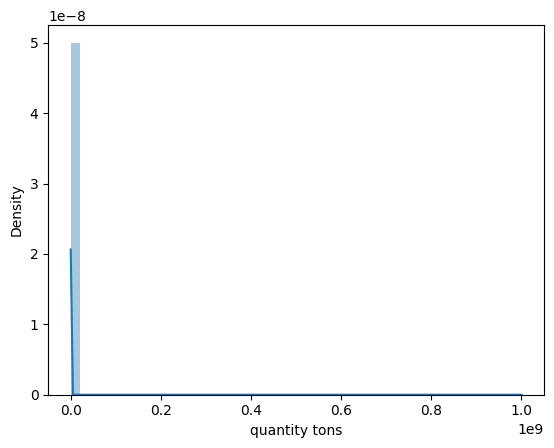

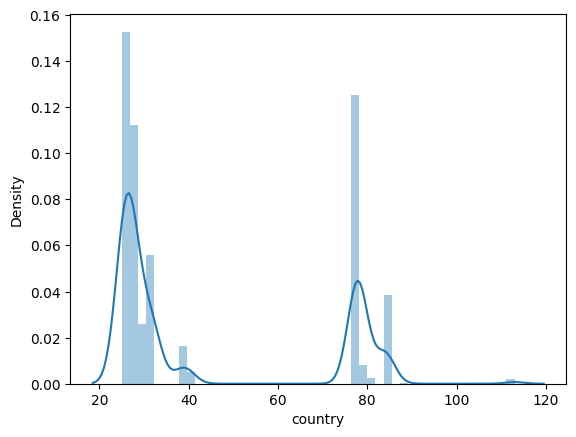

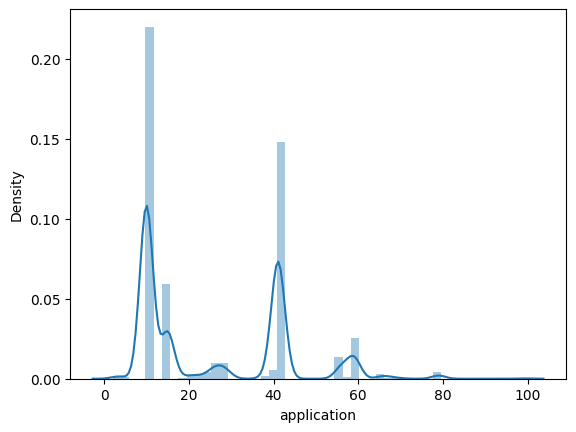

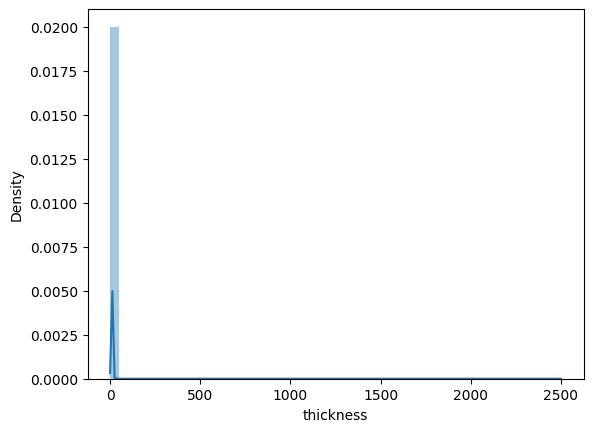

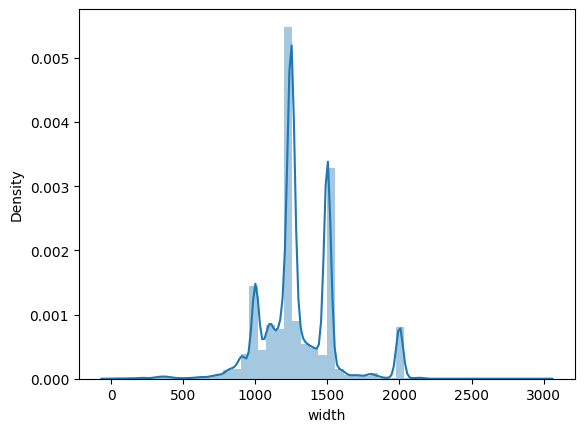

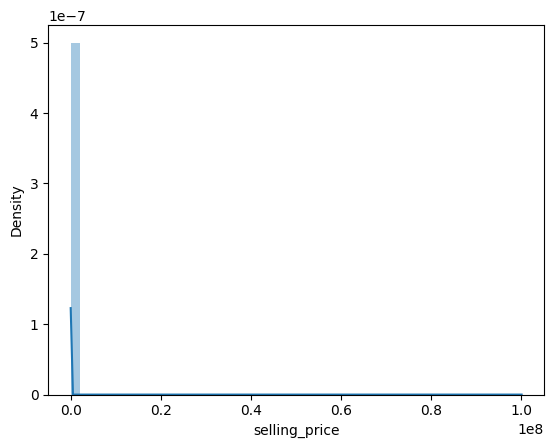

In [21]:
sns.distplot(df['quantity tons'])
plt.show()
sns.distplot(df['country'])
plt.show()
sns.distplot(df['application'])
plt.show()
sns.distplot(df['thickness'])
plt.show()
sns.distplot(df['width'])
plt.show()
sns.distplot(df['selling_price'])
plt.show()


In [23]:
mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())

7
4
0


In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [27]:
# Correcting skewness
df["selling_price_log"] = np.log(df["selling_price"])
df['quantity tons_log'] = np.log(df['quantity tons'])
df['thickness_log'] = np.log(df['thickness'])

In [29]:
df["selling_price_log"].skew(), df['quantity tons_log'].skew(), df['thickness_log'].skew()

(-5.335282266941793, -0.06877160468610836, 0.34901941695462646)

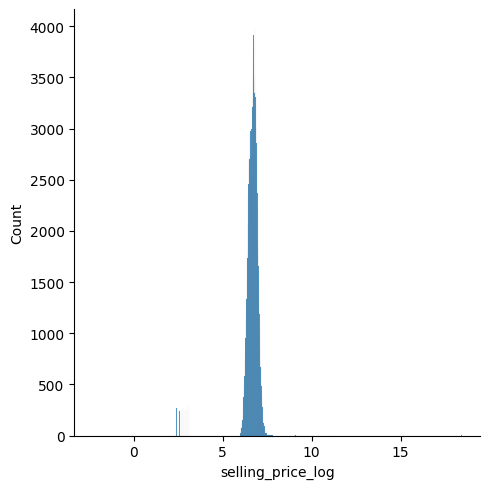

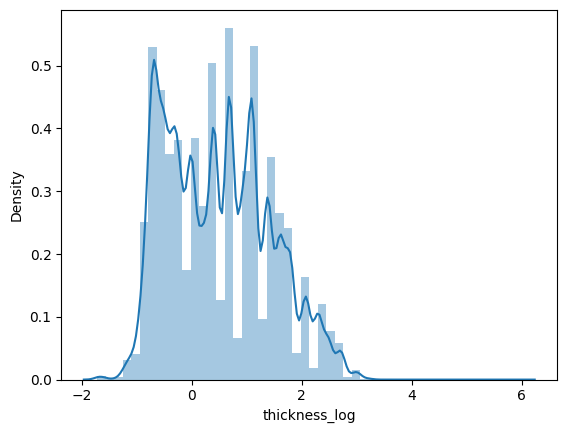

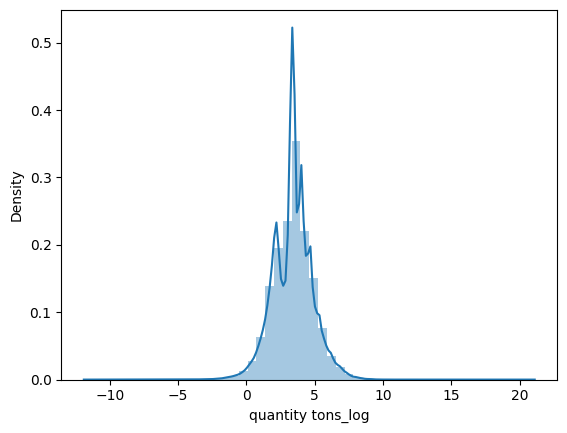

In [31]:
sns.displot(df["selling_price_log"])
plt.show()
sns.distplot(df["thickness_log"])
plt.show()
sns.distplot(df["quantity tons_log"])
plt.show()

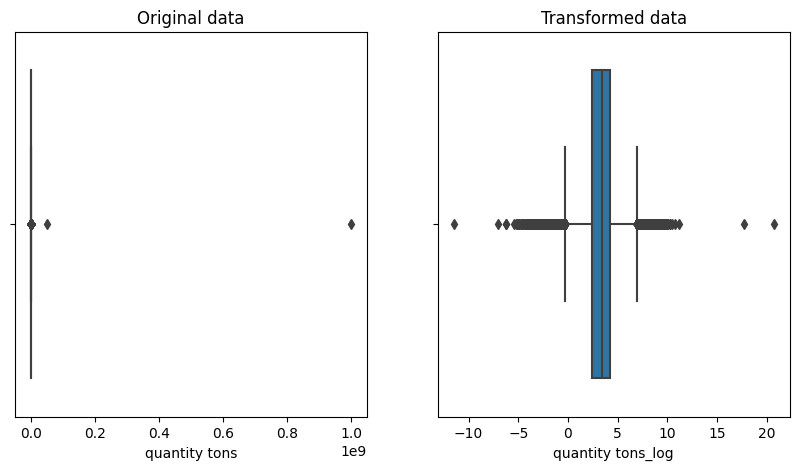

In [36]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x = df['quantity tons'], ax=ax[0])
sns.boxplot(x = df['quantity tons_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

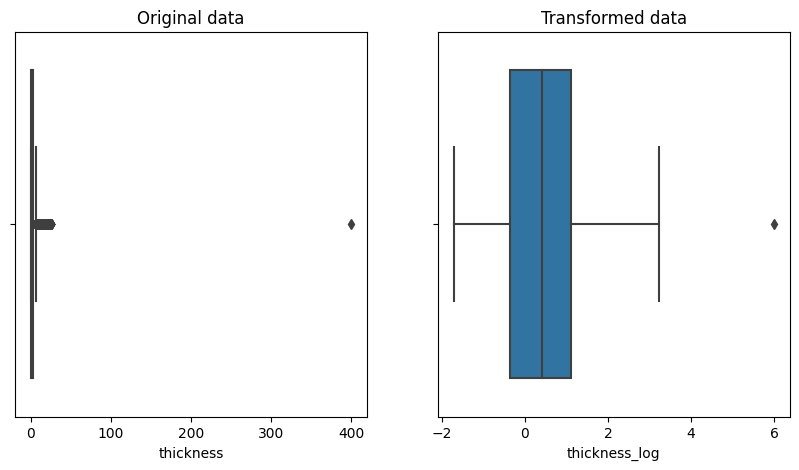

In [37]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x = df['thickness'], ax=ax[0])
sns.boxplot(x = df['thickness_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

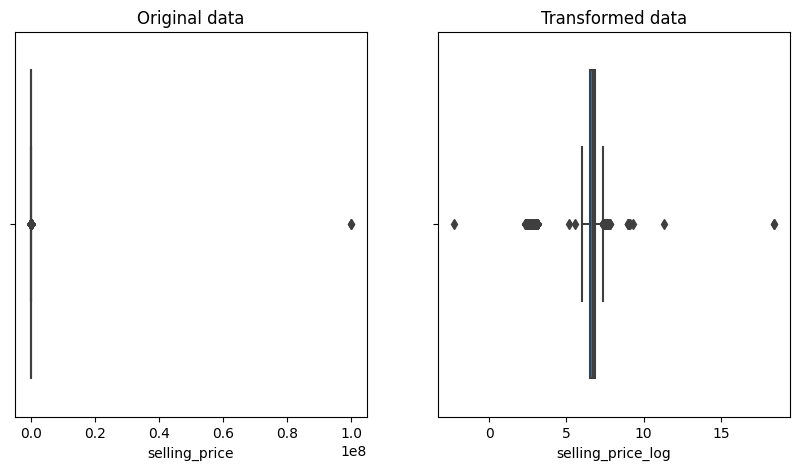

In [39]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x = df['selling_price'], ax=ax[0])
sns.boxplot(x = df['selling_price_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<Axes: >

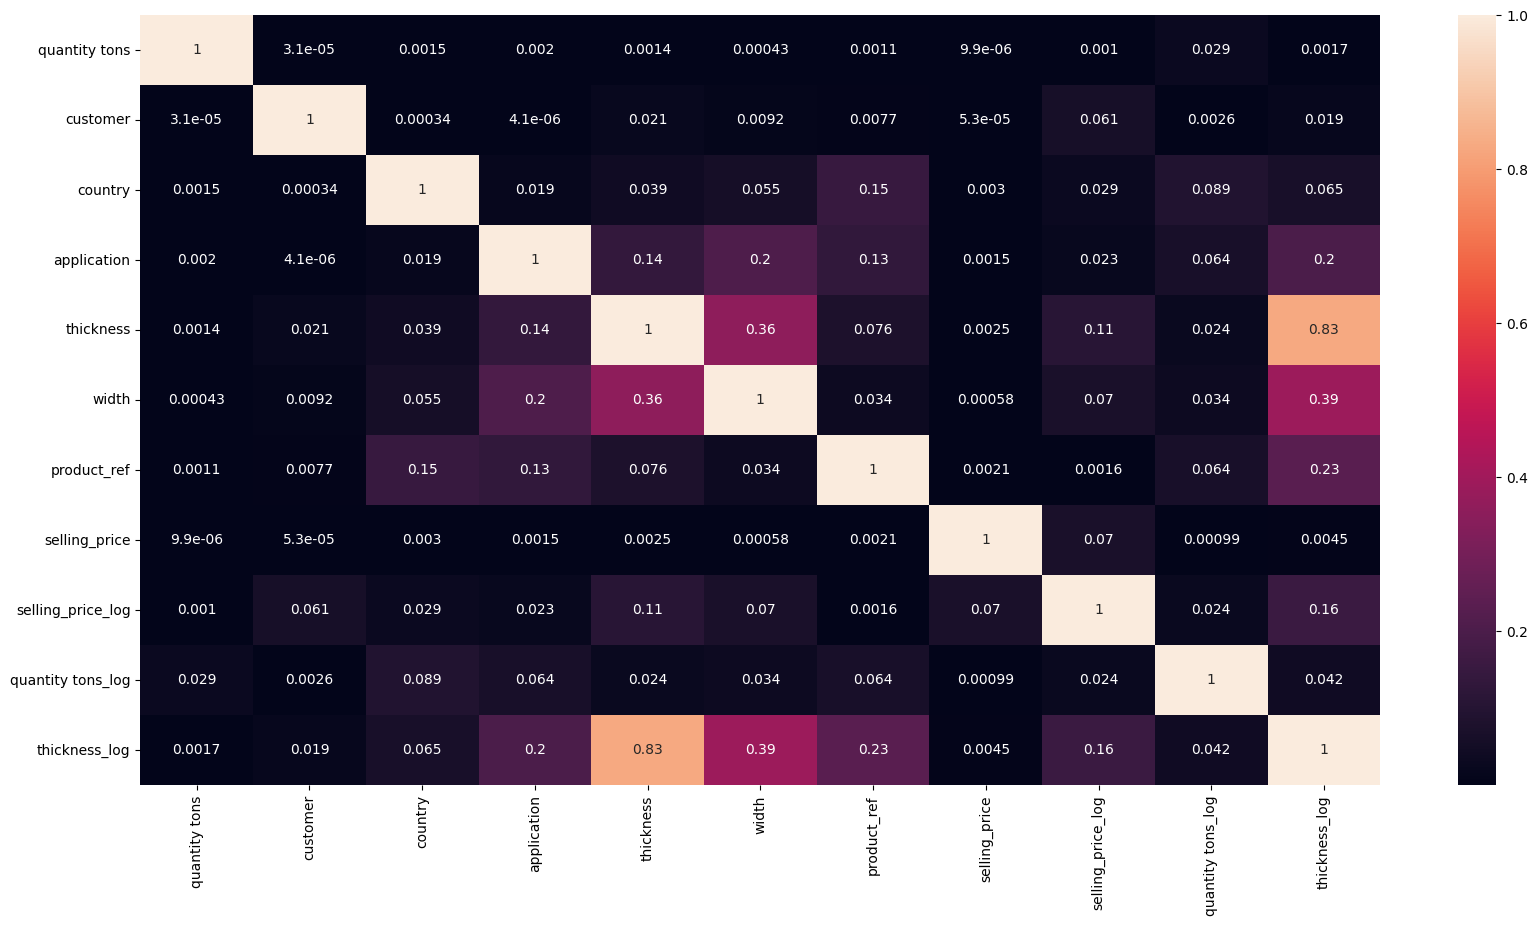

In [40]:
# Correlation between variables
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)

Creating Model

Decision Tree Regressor

A decision tree regressor model is created to predict the selling price

In [41]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [42]:
# Defining independent and dependent variables
x = df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y = df['selling_price_log']

In [45]:
# Encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item type']])
X_ohe = ohe.fit_transform(x[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(x[['status']])
X_be = ohe2.fit_transform(x[['status']]).toarray()

In [55]:
# Independent features after encoding
X = np.concatenate((x[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [57]:
# Decision tree
dtr = DecisionTreeRegressor()

In [58]:
# Hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [59]:
# Gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [60]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [61]:
# Evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.028026325436290512
R-squared: 0.9089466344736032


In [75]:
# Prediction 
new_sample = np.array([[np.log(10), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2,3,4,5,6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [744.00643611]


In [76]:
# Saving the model
import pickle
with open('rmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('rscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('rt.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('rs.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

Decision Tree Classifier

A decision tree classifier model is created to predit the status whether won or lost.

In [77]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [78]:
df_c = df[df['status'].isin(['Won', 'Lost'])]

In [79]:
len(df_c)

150440

In [80]:
# Defining independent and dependent columns
Y = df_c['status']
X = df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]


In [81]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)

In [82]:
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [83]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [85]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9127559159797926


In [86]:
# Confusion matix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[ 5577  1308]
 [ 1317 21886]]


In [87]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [88]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6885
           1       0.94      0.94      0.94     23203

    accuracy                           0.91     30088
   macro avg       0.88      0.88      0.88     30088
weighted avg       0.91      0.91      0.91     30088



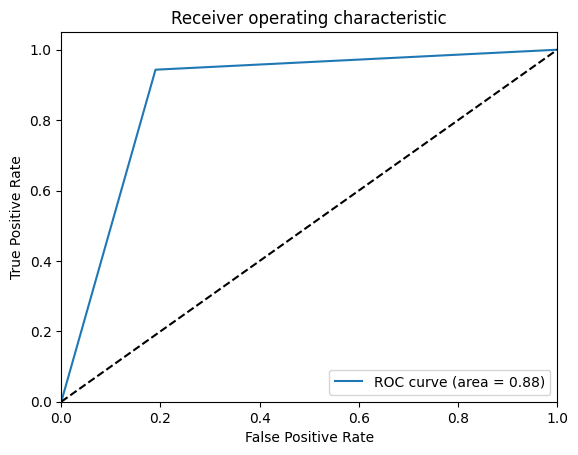

In [89]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
# Prediction
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [93]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)